In [1]:
import pandas as pd
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates


In [2]:

# Get the list of S&P 500 constituents
sp500_tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4).Ticker.dropna().to_list()

# Retrieve historical data
df = yf.download(sp500_tickers, period='10y')
sp500 = df['Adj Close'].dropna(how='all', axis=1)


[*********************100%%**********************]  504 of 504 completed


3 Failed downloads:
['-', 'BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')


In [3]:
sp500.tail(1) #Adjusted Close



,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-19 00:00:00,139.244003,14.305,196.125,153.869995,147.009995,108.239998,74.709999,341.67749,606.320007,197.070099,...,91.080002,62.02,102.684998,34.540001,111.285004,131.229996,119.580002,270.070007,43.6325,198.485001


In [4]:
# Define the time period and lag, can be changed to any number and code will work
time_period = 1260  # 5 years
lag = 20 # lag of 20 days

# Calculate the rolling mean price
lagged_closed_price = sp500[-lag -time_period: -lag] #slice the dataframe to get 5 years
rolling_mean_price = lagged_closed_price.rolling(window= time_period-251).mean().dropna(how='all')

rolling_mean_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-18,106.956831,20.954892,106.222068,93.971907,NaN,96.553468,38.320932,237.763854,410.016799,127.904922,...,97.198545,59.877583,57.533019,47.943816,87.348873,102.198167,126.396901,330.938860,43.994996,148.875490
2022-11-21,107.037569,20.932776,106.321918,94.049748,NaN,96.588749,38.349574,237.891402,410.098663,127.978889,...,97.170625,59.899550,57.578773,47.938666,87.392364,102.238073,126.401134,331.014479,44.002288,148.931912
2022-11-22,107.132114,20.911696,106.425731,94.131751,NaN,96.626359,38.378840,238.026736,410.208861,128.065303,...,97.147233,59.921199,57.627404,47.933555,87.437755,102.279555,126.409442,331.105302,44.009947,148.991569
2022-11-23,107.220483,20.891276,106.532534,94.214464,NaN,96.666436,38.408702,238.167247,410.323876,128.149325,...,97.126014,59.943020,57.677215,47.929039,87.485882,102.323403,126.421405,331.212705,44.018791,149.054653
2022-11-25,107.310244,20.870233,106.636466,94.298918,NaN,96.707909,38.439158,238.311356,410.431229,128.230713,...,97.099859,59.966166,57.726190,47.925040,87.533274,102.367978,126.434280,331.319306,44.028079,149.117114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14,121.355816,16.862388,135.285904,114.420899,NaN,103.996422,47.514668,268.744350,450.052676,147.612132,...,93.265830,62.971696,69.391258,45.246734,94.909095,110.450682,128.677151,349.607443,43.244780,165.030838
2023-11-15,121.394125,16.845548,135.409004,114.485612,NaN,104.015411,47.556432,268.887830,450.353558,147.686767,...,93.235490,62.977981,69.438208,45.222533,94.935756,110.485401,128.651703,349.580267,43.237057,165.090908
2023-11-16,121.432913,16.829330,135.533182,114.550816,NaN,104.036751,47.599177,269.030241,450.659326,147.759641,...,93.204645,62.983570,69.484427,45.198305,94.964245,110.521277,128.627454,349.553449,43.229615,165.153603


In [5]:

# Function to calculate momentum factors
def calculate_momentum_factors():

    # Calculate the 52-week trend
    slope_info = pd.DataFrame(index=sp500.columns)
    for i in range(1, lag + 1): 
        slope_info[i] = rolling_mean_price.apply(
            lambda x: np.polyfit(
                np.arange(len(x[-i - 252: -i])),
                                  x[-i - 252: -i], 1)[0] if x[-i - 252: -i].notna().all() else np.nan) 
    
    _52_week_trend = slope_info.mean(axis=1) 


    # Percent above 260 day Low
    percent_above_260 = (lagged_closed_price - lagged_closed_price.rolling(window=260).min()) / lagged_closed_price.rolling(window=260).min() * 100
    percent_above_260 = percent_above_260.dropna(how='all').mean()

    # Oscillator calculations
    oscillator = (lagged_closed_price.rolling(window=4*5).mean() - lagged_closed_price.rolling(window=52*5).mean()) / lagged_closed_price.rolling(window=52*5).mean() * 100
    oscillator = oscillator.dropna(how='all').mean()    

    # 39 week returns
    
    returns_39w = lagged_closed_price.pct_change(periods= 39 * 5).dropna(how='all').mean() 
    

    # 51 week Volume Price Trend
    volume = df['Volume'].dropna(how='all', axis=1)[-lag - time_period: -lag]
    vpt = (volume * lagged_closed_price.pct_change()).cumsum() # volume price trend is the cumulative sum of volume * pct_change 
    vpt_51w = (vpt - vpt.shift(periods=51 * 5)).dropna(how='all').mean()
    # the shift is used to shift the df by 51 weeks so that we can calculate the difference between the current and prior 51 week period 
    

    # Creating the DataFrame
    new_table = pd.DataFrame(index=sp500.transpose().index)
    new_table['Slope 52 Week Trend-Line'] = _52_week_trend
    new_table['Percent above 260 Day Low'] = percent_above_260
    new_table['4/52 Week Oscillator'] = oscillator
    new_table['39_Week_Return'] = returns_39w
    new_table['51 Week Volume Price Trend'] = vpt_51w
    return new_table



In [6]:
momentum_factors = calculate_momentum_factors()
momentum_factors



,Slope 52 Week Trend-Line,Percent above 260 Day Low,4/52 Week Oscillator,39_Week_Return,51 Week Volume Price Trend
A,0.058054,38.298116,7.010244,0.135462,5.918977e+04
AAL,-0.016227,44.097246,-6.985574,-0.051256,9.198440e+07
AAPL,0.120834,60.480597,15.864109,0.315704,3.205076e+07
ABBV,0.082561,40.342554,10.672054,0.176006,-1.382080e+06
ABNB,NaN,32.635749,-6.130659,-0.047640,1.301536e+06
...,...,...,...,...,...
YUM,0.034509,36.486749,3.349490,0.079771,3.913837e+04
ZBH,0.013743,34.864183,0.541547,0.040844,-5.304677e+04
ZBRA,0.084186,57.779057,4.757957,0.148861,-1.082096e+05
ZION,-0.004966,52.703091,-0.772815,0.031850,-1.390433e+06


In [7]:
z_scores = (momentum_factors - momentum_factors.mean()) / momentum_factors.std()
z_scores = z_scores.sum(axis=1) # summing the z-scores of each factor to get the total z-score per asset
# The z-score is the number of standard deviations away from the mean a data point is.


In [8]:
z_scores.sort_values(ascending=False, inplace= True) #sorts the z-scores in descending order
long_basket= z_scores[:10] #selects the top 10 z-scores
short_basket = z_scores[-10:] #selects the bottom 10 z-scores

print("Long Basket:")
print (long_basket)
print("Short Basket:") 
print(short_basket)


Long Basket:
TSLA    41.828165
MRNA    20.022725
ENPH    18.780363
NVDA    16.411004
NVR     15.538851
AZO      9.834504
BLDR     9.779092
CMG      9.515737
AMD      9.436775
FCX      8.319722
dtype: float64
Short Basket:
VZ     -5.238646
BXP    -5.328869
INTC   -5.361758
PARA   -5.375968
WBA    -5.376372
WBD    -5.816667
BAX    -5.992664
FIS    -6.180746
VTRS   -6.410173
VFC    -7.559778
dtype: float64


In [9]:
#Back-Test period of time_period year (20 Day Lag)

# Get the lagged closing prices for the long and short baskets
long_lagged_closed_price = lagged_closed_price[long_basket.index]
short_lagged_closed_price = lagged_closed_price[short_basket.index]


def calculate_cumulative_returns(dataf): 
    returns = dataf.pct_change()
    cumulative_returns = (1 + returns).cumprod().mean(axis=1) 
    return cumulative_returns

# Calculate the cumulative returns for the SP500, long basket, and short basket
cumulative_returns = calculate_cumulative_returns(lagged_closed_price)
long_cumulative_returns = calculate_cumulative_returns(long_lagged_closed_price)
short_cumulative_returns = calculate_cumulative_returns(short_lagged_closed_price)



## Cumulative Returns

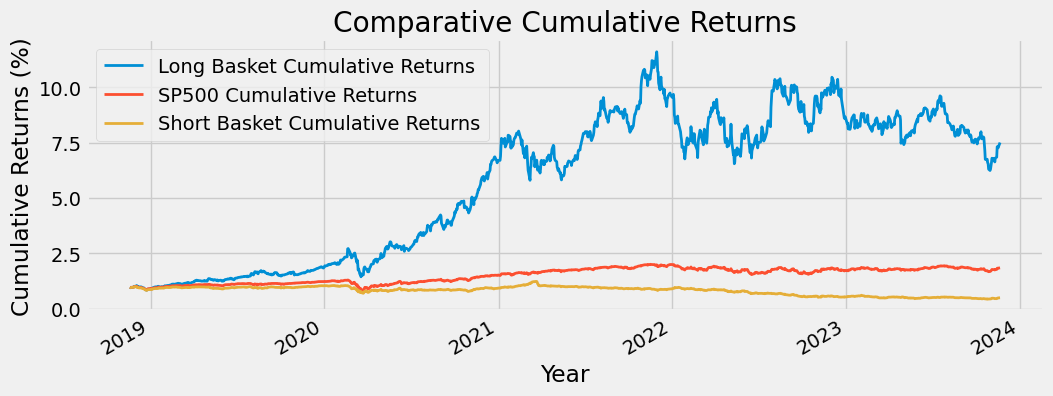

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,4))
long_cumulative_returns.plot(label='Long Basket Cumulative Returns', lw=2) # lw is line width
cumulative_returns.plot(label='SP500 Cumulative Returns', lw =2)
short_cumulative_returns.plot(label='Short Basket Cumulative Returns', lw=2)

plt.legend()
plt.title('Comparative Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()

## Monthly Long basket return bar chart (pos/neg coloring) vs SP500

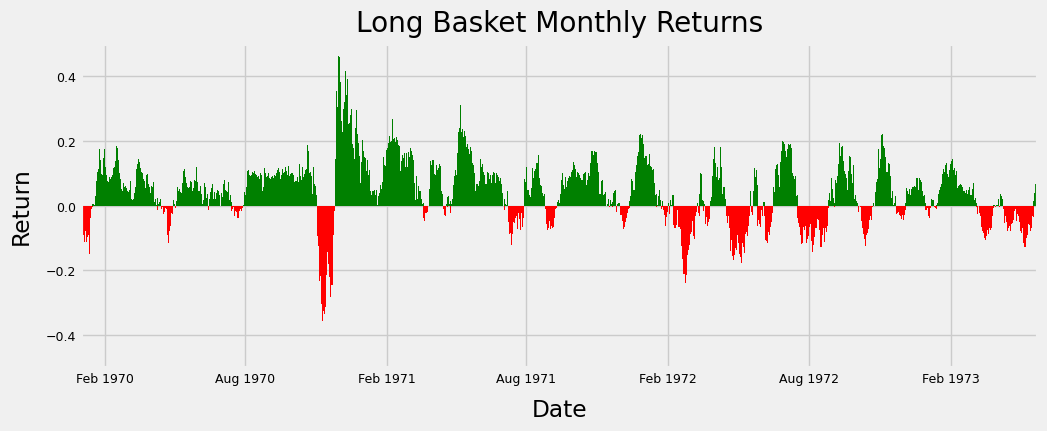

In [11]:

# Calculate 20-day returns, take the mean, drop NaNs, and plot
plt.style.use('fivethirtyeight')
long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(# 20-day returns plot
    kind='bar', # bar plot
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.tick_params(axis='both', labelsize=9) # tick label size
plt.xticks(rotation=0) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Date format messes up when using the bar plot
plt.ylim(-0.5, 0.5) 
plt.ylabel('Return',labelpad=9) # adjust the label position
plt.xlabel('Date',labelpad=9) # adjust the label position
plt.title('Long Basket Monthly Returns',pad=9) # adjust the title position
plt.show()
plt.show()

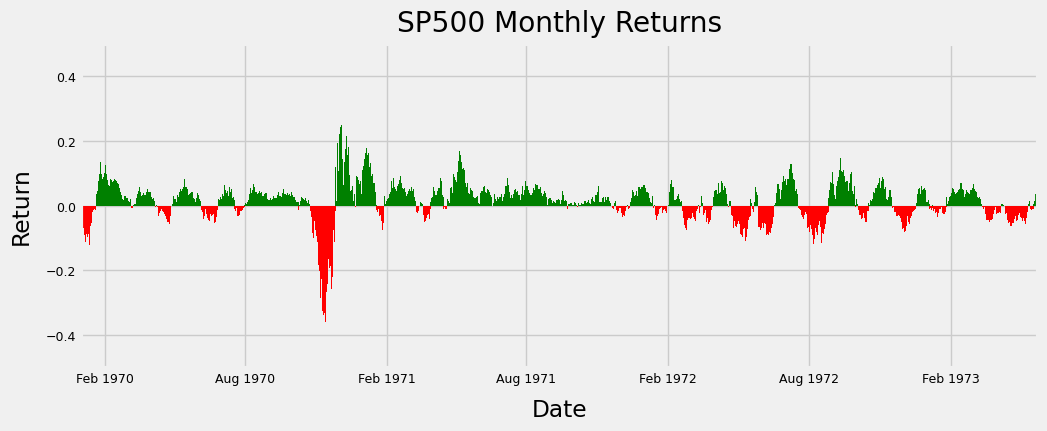

In [112]:

plt.style.use('fivethirtyeight')
lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.tick_params(axis='both', labelsize=9)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Date format messes up when using the bar plot
plt.ylim(-0.5, 0.5) # keeping the same y-axis limits as the original plot
plt.ylabel('Return',labelpad=9)
plt.xlabel('Date',labelpad=9)
plt.title('SP500 Monthly Returns',pad=9)
plt.show()

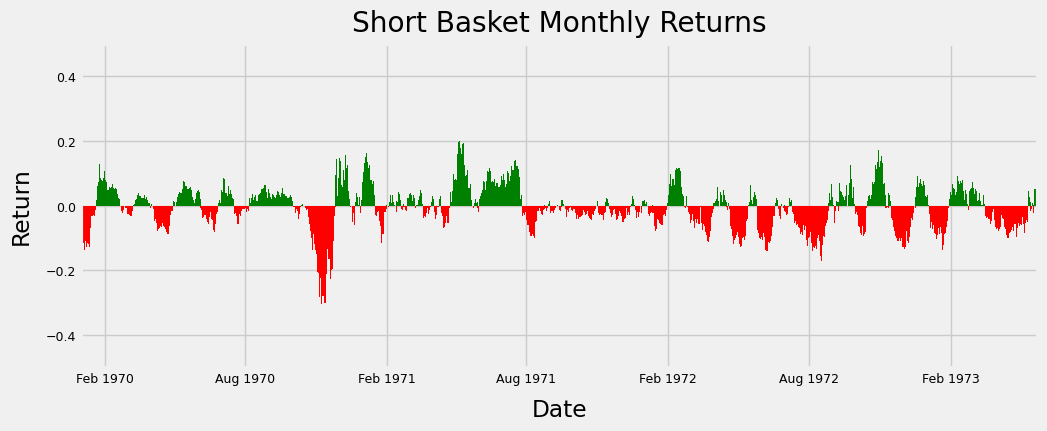

In [12]:
plt.style.use('fivethirtyeight')
short_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in short_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.tick_params(axis='both', labelsize=9)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Date format messes up when using the bar plot
plt.ylim(-0.5, 0.5)
plt.ylabel('Return',labelpad=9)
plt.xlabel('Date',labelpad=9)
plt.title('Short Basket Monthly Returns',pad=9)
plt.show()
plt.show()




## Monthly return for long picks vs short picks vs SP500

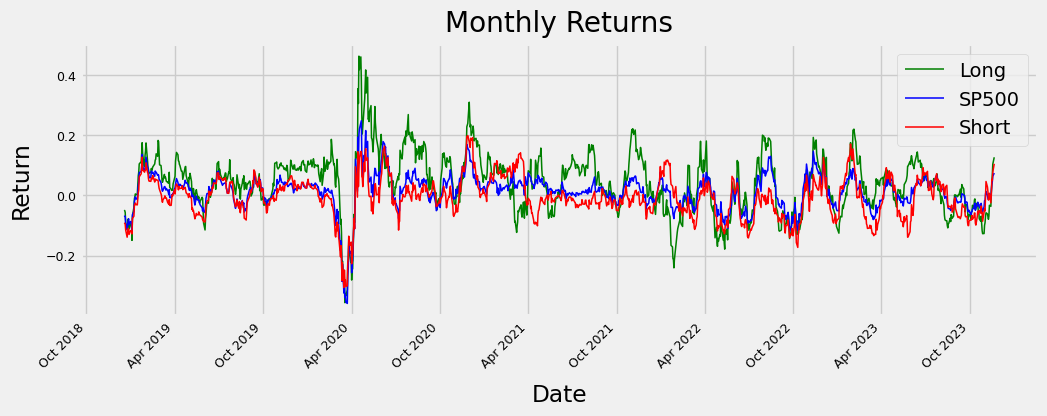

In [13]:
# monthly returns 

monthly_graph = pd.DataFrame()
plt.style.use('fivethirtyeight')
long_lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'Long', color = 'green', lw=1.1)
lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'SP500', color ='blue', lw = 1.1)
short_lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4),label= 'Short', color = 'red', lw=1.1)
plt.legend()
# Set x-ticks to be months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y',))
plt.xticks(rotation=45)
plt.tick_params(axis='both', labelsize=9)
plt.ylabel('Return',labelpad=9)
plt.xlabel('Date',labelpad=9)
plt.title('Monthly Returns',pad=9)
plt.show()




# Extra Credit : Portfolio weights
## Imported class from Efficient Frontier 

In [16]:
%%capture 
# ^ this is used to suppress the output of the cell
import sys

# Add the directory containing the module to the Python path
sys.path.insert(0, '/Users/jcarlito/Documents/GitHub/Quantative-Finance-Repo/Finished_workbooks/EF')

from Efficient_Frontier import EfficientFrontier

In [17]:
ef = EfficientFrontier(sp500[long_basket.index])
ef.calculate_portfolio() #Printing Annual Returns


TSLA    1.481890
MRNA    1.579368
ENPH    1.630489
NVDA    1.593639
NVR     1.240821
AZO     1.203810
BLDR    1.444322
CMG     1.208701
AMD     1.525728
FCX     1.176628
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


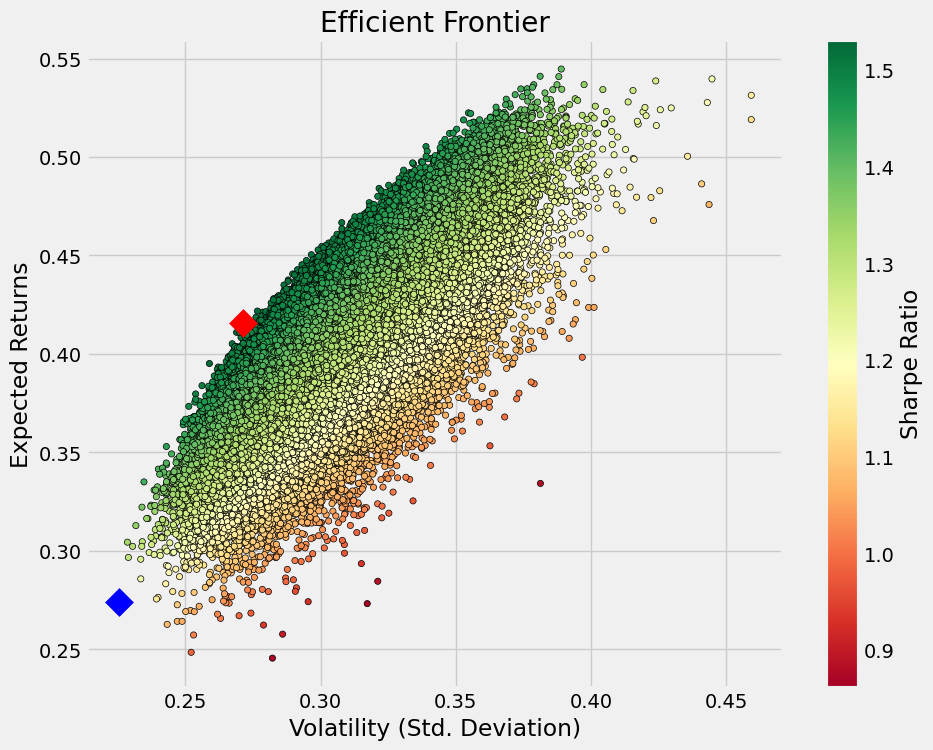

In [19]:
ef.plot_frontier()

In [20]:
ef.get_optimal_portfolio()

              Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                           0.274233                  0.415608
Volatility                        0.225317                  0.271352
Sharpe Ratio                      1.217100                  1.531620
TSLA Weight                       0.007417                  0.075785
MRNA Weight                       0.041868                  0.111688
ENPH Weight                       0.001955                  0.081093
NVDA Weight                       0.045121                  0.221835
NVR Weight                        0.273706                  0.141106
AZO Weight                        0.272002                  0.216795
BLDR Weight                       0.038970                  0.078451
CMG Weight                        0.193547                  0.061169
AMD Weight                        0.049188                  0.010421
FCX Weight                        0.076225                  0.001657
